In [1]:
from src import Segment, maximum_density_subsegment

In [2]:
values = [5, 2, 1, 6, 8, 9, 0, 1, 2, 7]
weights = [1, 1, 1, 1, 2, 1, 3, 1, 1, 1]
segment = Segment(values, weights)

In [3]:
segment[:]

array([[5, 2, 1, 6, 8, 9, 0, 1, 2, 7],
       [1, 1, 1, 1, 2, 1, 3, 1, 1, 1]])

In [4]:
res = maximum_density_subsegment(segment, w_min=3, w_max=6)
print(res)

[4.         5.         8.33333333]


In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from src import exp_decreasing_distribution

In [22]:
# distrib = exp_decreasing_distribution(2)
# rand = np.random.choice(2, (22, 22), p=distrib)

In [212]:
adj_mat = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0]])

In [213]:
adj_mat = np.tril(adj_mat) + np.tril(adj_mat, -1).T

In [214]:
edges = [(i, j, {
    "weight": int(adj_mat[i, j])
}) for i in range(22) for j in range(i)
         if adj_mat[i, j]]

net = nx.Graph()
net.add_edges_from(edges)

In [215]:
nodes = np.unique(np.array(edges)[:, :2])

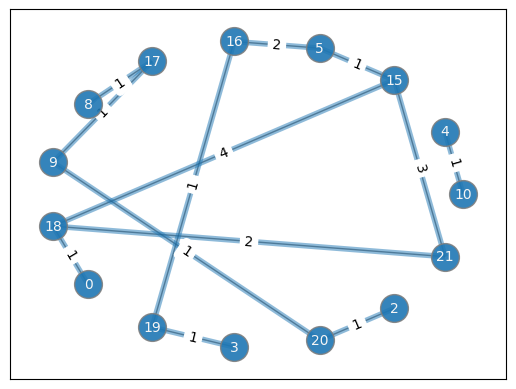

In [216]:
# pos = nx.spring_layout(net)
pos = nx.circular_layout(net)
# color_map = ['blue' for _ in net]
# nx.draw(net, pos, node_color=color_map, with_labels=True)

options = {"edgecolors": "tab:gray", "node_size": 400, "alpha": 0.9}

# nodes
nx.draw_networkx_nodes(net,
                       pos,
                       nodelist=nodes,
                       node_color="tab:blue",
                       **options)

# nx.draw_networkx_nodes(net,
#                        pos,
#                        nodelist=[15, 18, 21],
#                        node_color="tab:red",
#                        **options)

# edges
nx.draw_networkx_edges(net, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(net,
                       pos,
                       edgelist=edges,
                    #    edgelist=[edge for edge in edges if not edge[0] in [15, 18, 21] or not edge[1] in [15, 18, 21]],
                       width=4,
                       alpha=0.5,
                       edge_color="tab:blue")

# nx.draw_networkx_edges(net,
#                        pos,
#                        edgelist=[edge for edge in edges if edge[0] in [15, 18, 21] and edge[1] in [15, 18, 21]],
#                        width=4,
#                        alpha=0.5,
#                        edge_color="tab:red")

# weights
weights = nx.get_edge_attributes(net, "weight")
nx.draw_networkx_edge_labels(net, pos, edge_labels=weights)

# labels
labels = {n: n for n in nodes}
nx.draw_networkx_labels(net, pos, labels, font_size=10, font_color="whitesmoke")

plt.show()